In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data_Oval_Office/2020_out_heading_matched_out.csv")

In [3]:
data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target,Poll
0,1,0,0,0,0,0,0,0,0,0,...,-0.937159,-0.216342,-1.577553,-1.336384,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0.775301,-0.860445,1.384752,0.643917,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0.340667,0.086206,1.033292,0.452275,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,-1.219672,-0.503647,-1.527345,-1.911310,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,2.570342,4.191641,1.284335,1.282724,0,0,0,0,0,0


In [4]:
data_2020_augmented = pd.concat([data, data], ignore_index=True)

In [5]:
data_2020_augmented.shape

(100, 364)

In [6]:
# Split data into features (X) and label (y)
X = data_2020_augmented.drop('Target', axis=1)  # Drop the target column for features
y = data_2020_augmented['Target']  # Target column

In [7]:
test_data = pd.read_csv("/content/drive/MyDrive/Data_Oval_Office/2023_out_heading_matched_out.csv")

In [8]:
test_data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target,Poll
0,1,0,0,0,0,0,0,0,0,0,...,-1.020961,-0.207013,-1.194113,-1.200626,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0.284112,-0.853351,1.323595,0.793232,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,1.068491,0.104547,0.963923,0.362128,0,0,1,0,1,1
3,0,0,0,1,0,0,0,0,0,0,...,-1.184512,-0.505172,-0.834441,-1.739507,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,2.350199,4.035256,1.143759,1.386001,0,0,0,0,0,0


In [9]:
for i in range(7):
    X[f'poll{i}'] = X[['Poll']]
    test_data[f'poll{i}'] = test_data[['Poll']]

In [10]:
X_train = X
y_train = y
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [11]:
X_train.shape

(100, 370)

In [12]:
X_test.shape

(50, 370)

In [13]:
print("Unique classes in y_train:", set(y_train))
print("Unique classes in y_test:", set(y_test))

Unique classes in y_train: {0, 1}
Unique classes in y_test: {0, 1}


In [14]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Another Dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.6148 - loss: 0.6721 - val_accuracy: 0.7500 - val_loss: 0.5659
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7516 - loss: 0.5406 - val_accuracy: 0.9000 - val_loss: 0.4330
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9375 - loss: 0.3393 - val_accuracy: 0.9000 - val_loss: 0.3344
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9758 - loss: 0.2431 - val_accuracy: 0.9000 - val_loss: 0.2763
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9719 - loss: 0.1831 - val_accuracy: 0.9000 - val_loss: 0.2337
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9578 - loss: 0.1547 - val_accuracy: 0.9000 - val_loss: 0.1898
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9898 - loss: 0.0926 - val_accuracy: 0.9500 - val_loss: 0.1463
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9898 - loss: 0.0686 - val_accuracy: 1.0000 - val_loss: 0.1077

In [16]:
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [17]:
predicted_winner = np.sum(predictions_binary)  # Count of predicted wins for Candidate A (1)
predicted_loser = len(predictions_binary) - predicted_winner  # Count of predicted wins for Candidate B (0)

print(f"Predicted number of wins for Candidate 1: {predicted_winner}")
print(f"Predicted number of wins for Candidate 0: {predicted_loser}")

Predicted number of wins for Candidate 1: 23
Predicted number of wins for Candidate 0: 27


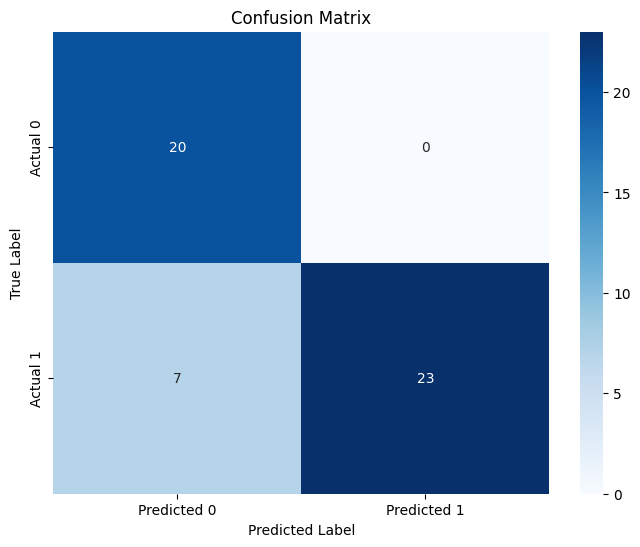

In [18]:
cm = confusion_matrix(y_test, predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
accuracy = accuracy_score(y_test, predictions_binary)
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)
roc_auc = roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8600
Precision: 1.0000
Recall: 0.7667
F1 Score: 0.8679
ROC AUC Score: 0.9767


In [20]:
electoral_college = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 30,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 19,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 15,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 28,
    "North Carolina": 16,
    "North Dakota": 3,
    "Ohio": 17,
    "Oklahoma": 7,
    "Oregon": 8,
    "Pennsylvania": 19,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 40,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 4,
    "Wisconsin": 10,
    "Wyoming": 3
}

In [26]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Data_Oval_Office/2023_out_heading_matched_out.csv')

# Create predictions DataFrame
y_test_pred = predictions_binary
df_pred = pd.DataFrame(y_test_pred,columns=['prediction'])

# Extract state information
state_columns = [col for col in df.columns if col.startswith('state_')]
states = df[state_columns].idxmax(axis=1).apply(lambda x: x.replace('state_', ''))

# Add state and target columns to df_pred
df_pred['state'] = states
df_pred['target'] = y_test

df_pred['electoral_college_Seats'] = df_pred['state'].map(lambda x: electoral_college[x])
df_pred.groupby(['prediction'])['electoral_college_Seats'].sum().reset_index()

,prediction,electoral_college_Seats
0,0,346
1,1,188


In [27]:
df_pred

,prediction,state,target,electoral_college_Seats
0,1,Alabama,1,9
1,1,Alaska,1,3
2,0,Arizona,1,11
3,1,Arkansas,1,6
4,0,California,0,55
5,0,Colorado,0,9
6,0,Connecticut,0,7
7,0,Delaware,0,3
8,0,Florida,1,30
9,0,Georgia,1,16
